In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as mt
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('card_transdata.csv')

In [3]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


### Distribución de datos

Text(0.5, 1.0, 'Distribution distance from last transaction')

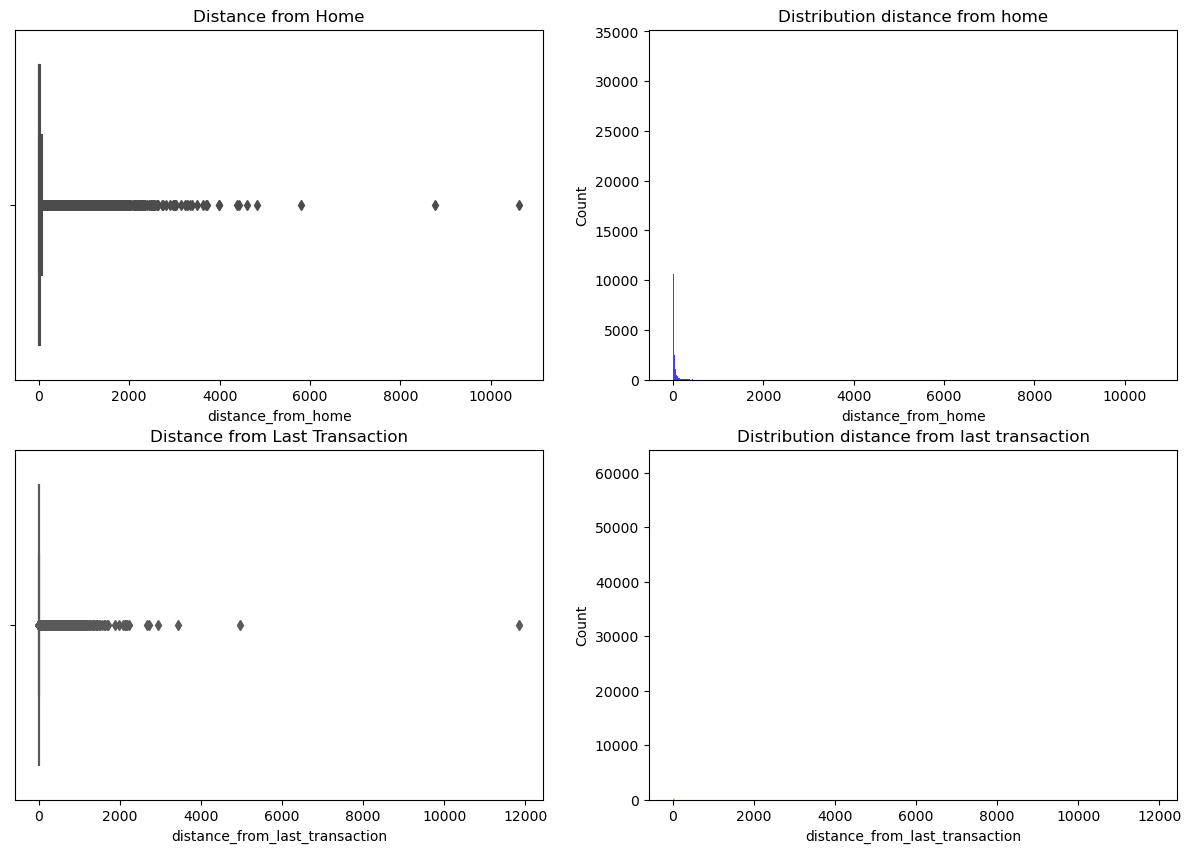

In [15]:
fig,axes= plt.subplots(2,2, figsize=(15,10))
sns.boxplot(ax=axes[0,0],x=data["distance_from_home"], palette="Set1")
axes[0,0].set_title("Distance from Home")

sns.histplot(ax=axes[0,1],x=data["distance_from_home"], color="b")
axes[0,1].set_title("Distribution distance from home")

sns.boxplot(ax=axes[1,0],x=data.iloc[:,1], palette="Set2")
axes[1,0].set_title("Distance from Last Transaction")

sns.histplot(ax=axes[1,1],x=data.iloc[:,1], color="y")
axes[1,1].set_title("Distribution distance from last transaction")


Text(0.5, 1.0, 'Ratio to median purchase price')

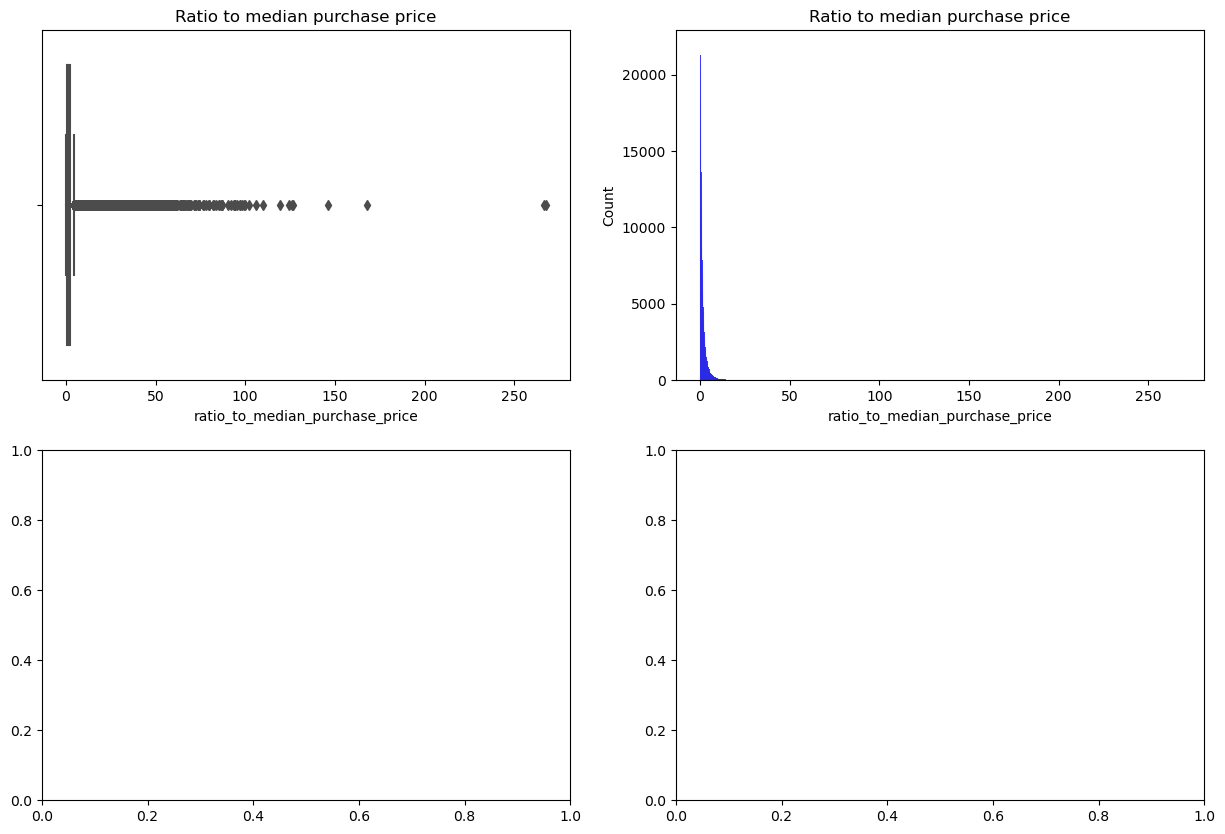

In [17]:
fig,axes= plt.subplots(2,2, figsize=(15,10))
sns.boxplot(ax=axes[0,0],x=data.iloc[:,2], palette="Set1")
axes[0,0].set_title("Ratio to median purchase price")

sns.histplot(ax=axes[0,1],x=data.iloc[:,2], color="b")
axes[0,1].set_title("Ratio to median purchase price")

#sns.boxplot(ax=axes[1,0],x=data.iloc[:,3], palette="Set2")
#axes[1,0].set_title("Distance from Last Transaction")

#sns.histplot(ax=axes[1,1],x=data.iloc[:,3], color="y")
#axes[1,1].set_title("Distribution distance from last transaction")

## Correlacion de variables

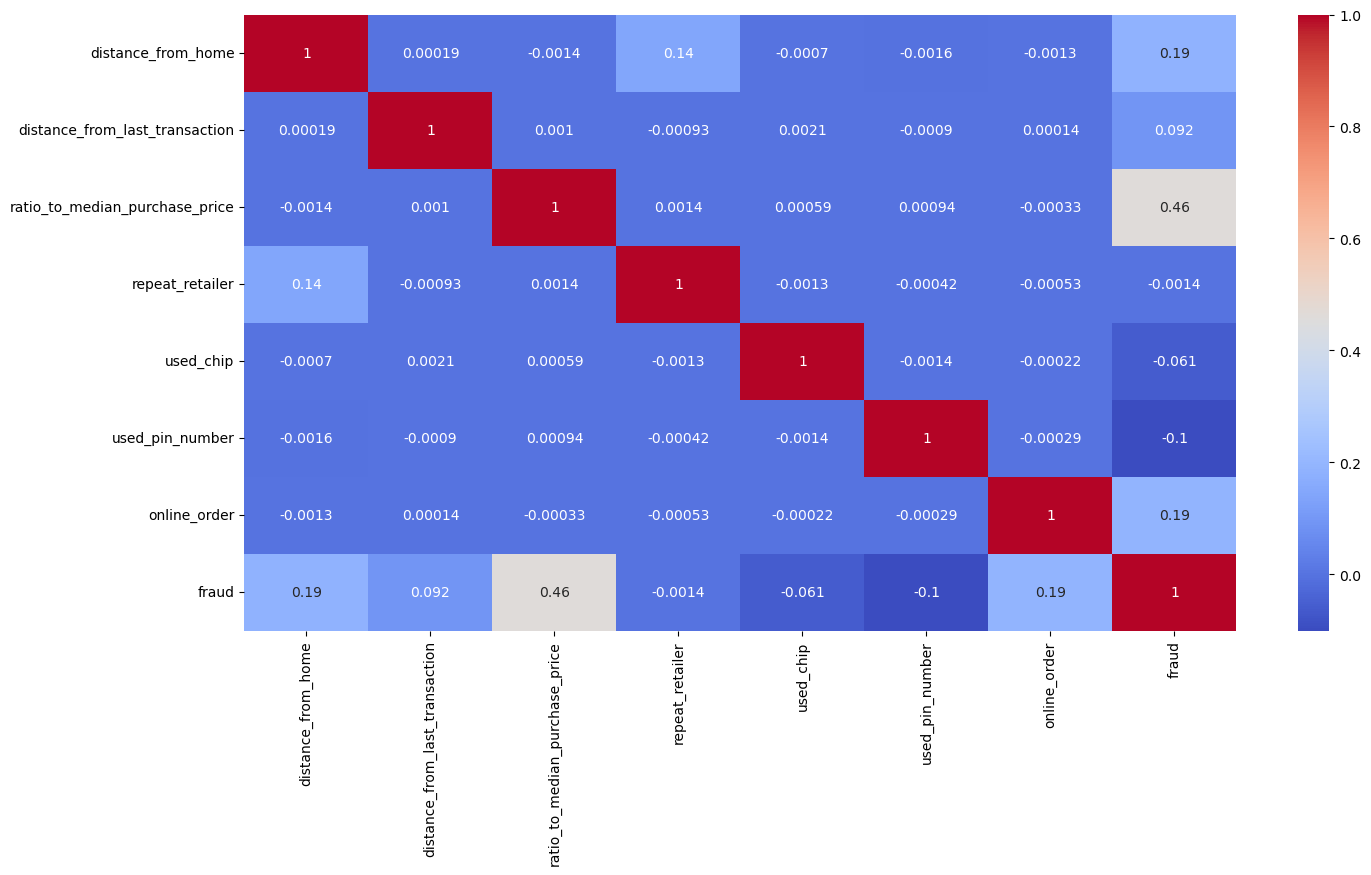

In [6]:
plt.figure(figsize=(16,8))
sns.heatmap(data=data.corr(), annot=True, cmap='coolwarm');

## Modelo XGBClassifier

### Particion 70/30

In [5]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [6]:
x = data.iloc[:,0:6]
y = data.iloc[:,7]

In [7]:
np.unique(y, return_counts=True)

(array([0., 1.]), array([912597,  87403], dtype=int64))

In [8]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

In [9]:
y2 = y.astype('category').cat.codes

In [10]:
y2

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Length: 1000000, dtype: int8

In [11]:
x

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number
0,57.877857,0.311140,1.945940,1.0,1.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0
...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0


In [12]:
scaler = StandardScaler()


In [13]:
x = scaler.fit_transform(x)

In [14]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size=test_size, stratify=y2)

In [15]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [16]:
predict = model.predict(X_train)
precision = accuracy_score(y_train, predict)
print(precision)

0.9616985714285714


In [17]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [18]:
precision_test = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (precision_test * 100.0))

Accuracy: 95.92%


### Particion 80/20

In [9]:
y2 = y.astype('category').cat.codes

In [7]:
x = data.iloc[:,0:6]
y = data.iloc[:,7]

In [10]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size=test_size, stratify=y2)

In [11]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
precision_test = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (precision_test * 100.0))

Accuracy: 95.89%


## Modelo vector supported machine

In [16]:
x= data.iloc[:,0:6]
y = data.iloc[:,7]
x=pp.StandardScaler().fit(x).transform(x.astype(float))
x

array([[ 0.47788202, -0.18284892,  0.04349141,  0.36658372,  1.36157608,
        -0.33445812],
       [-0.24160679, -0.18809398, -0.18930045,  0.36658372, -0.73444298,
        -0.33445812],
       [-0.3293694 , -0.16373307, -0.49881185,  0.36658372, -0.73444298,
        -0.33445812],
       ...,
       [-0.36264968, -0.13790278, -0.57369398,  0.36658372,  1.36157608,
        -0.33445812],
       [-0.34209827, -0.1855234 , -0.48162807,  0.36658372, -0.73444298,
        -0.33445812],
       [ 0.48140344, -0.18257921, -0.51338354,  0.36658372,  1.36157608,
        -0.33445812]])

### Particion 70/30

In [18]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)

In [ ]:
model= svm.SVC(kernel='rbf',C=2, degree=3)
model.fit(X_train, y_train)